In [24]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
features = ['sepal length', 'sepal width', 'petal length', 'petal width', 'target']
# load dataset into Pandas DataFrame
df = pd.read_csv(url, names=features)
df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [16]:
df.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


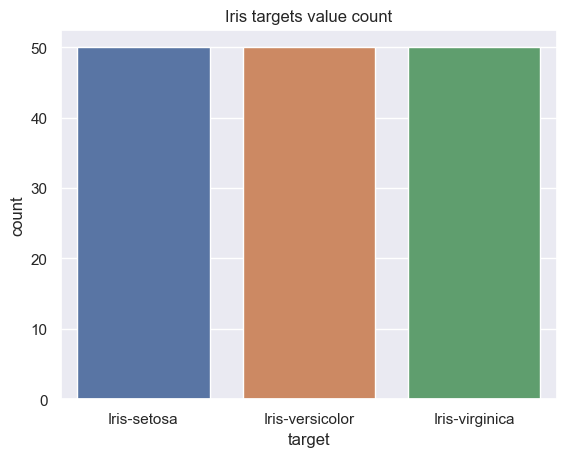

In [26]:
sns.countplot(
    x='target', 
    data=df)
plt.title('Iris targets value count')
plt.show()

In [35]:
from sklearn.preprocessing import StandardScaler
X = df[features]
X.drop('target', axis=1, inplace=True)
y = df['target']
X	
# data scaling
x_scaled = StandardScaler().fit_transform(X)

In [33]:
from sklearn.decomposition import PCA
 
pca = PCA(n_components=3)
 
pca_features = pca.fit_transform(x_scaled)
 
print('Shape before PCA: ', x_scaled.shape)
print('Shape after PCA: ', pca_features.shape)
 
pca_df = pd.DataFrame(
    data=pca_features, 
    columns=['PC1', 'PC2', 'PC3'])

Shape before PCA:  (150, 4)
Shape after PCA:  (150, 3)


In [37]:
pca_df['target'] = y

pca_df

,PC1,PC2,PC3,target
0,-2.264542,0.505704,-0.121943,Iris-setosa
1,-2.086426,-0.655405,-0.227251,Iris-setosa
2,-2.367950,-0.318477,0.051480,Iris-setosa
3,-2.304197,-0.575368,0.098860,Iris-setosa
4,-2.388777,0.674767,0.021428,Iris-setosa
...,...,...,...,...
145,1.870522,0.382822,0.254532,Iris-virginica
146,1.558492,-0.905314,-0.025382,Iris-virginica
147,1.520845,0.266795,0.179277,Iris-virginica
148,1.376391,1.016362,0.931405,Iris-virginica


#### Plot the explained variance (Eigen Value) to see the variance of each principal component feature.

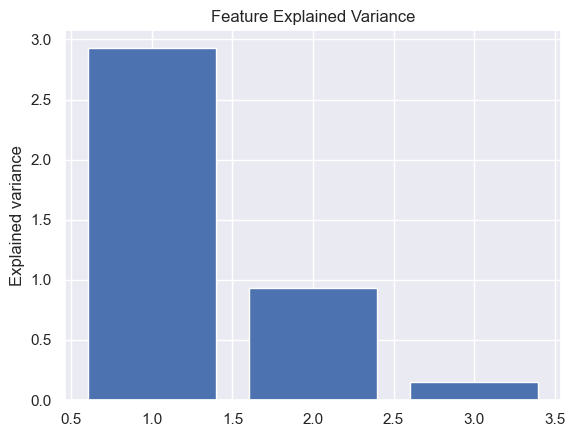

In [39]:
# Bar plot of explained_variance
plt.bar(
    range(1,len(pca.explained_variance_)+1),
    pca.explained_variance_
    )

plt.ylabel('Explained variance')
plt.title('Feature Explained Variance')
plt.show()

In [41]:
pca.explained_variance_

array([2.93035378, 0.92740362, 0.14834223])

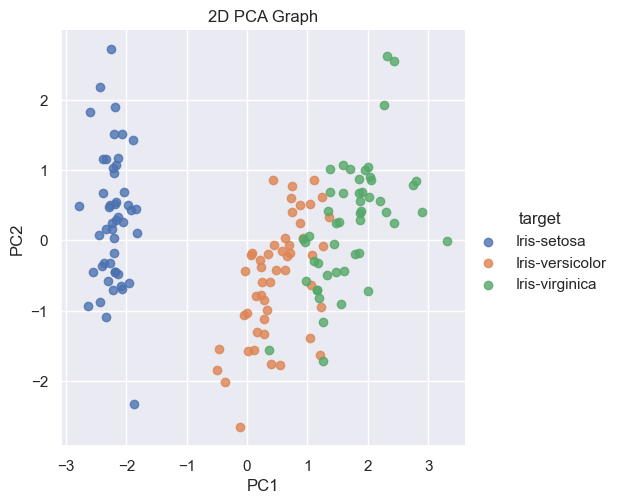

In [40]:
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()
 
sns.lmplot(
    x='PC1', 
    y='PC2', 
    data=pca_df, 
    hue='target', 
    fit_reg=False, 
    legend=True
    )
 
plt.title('2D PCA Graph')
plt.show()
